# Proyecto K vecinos más cercanos - Solución

¡Bienvenido al proyecto KNN! Este será un proyecto simple muy similar a la clase, excepto que se le dará otro conjunto de datos. Continúe y siga las instrucciones a continuación.

Los datos corresponden a un Mall que busca generar un modelo que basado en 3 variables podamos identificar si el cliente hará una compra o no (Purchased).

Purchased = 1 = compra
Purchased = 0 = no compra

## Importar bibliotecas
**Importa pandas, seaborn y las librerías habituales.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obten los datos

**Carga el archivo csv Mall_Customers.csv a un DataFrame**

In [2]:
df = pd.read_csv('Mall_Customers.csv')

**Muestra el head**

In [3]:
df.head() 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Crea un nuevo dataframe sin la columna User ID y llamalo df_new**

In [4]:
df_new = df.drop('User ID', axis=1)

# Análisis Exploratorio de Datos (EDA)

Solo haremos un pairplot y un count plot con la variable objetivo con seaborn para enfocarnos en el algoritmo y su desempeño.

**Use seaborn en el dataframe para crear un pairplot con el tono (hue) indicado por la columna Purchased.**

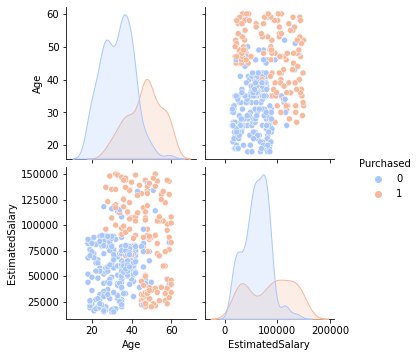

In [5]:
sns.pairplot(df_new,hue='Purchased',palette='coolwarm')

<AxesSubplot:xlabel='Purchased', ylabel='count'>

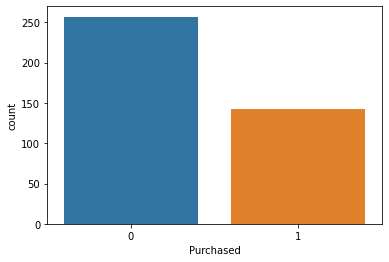

In [6]:
sns.countplot(x='Purchased', data=df_new)

# Estandarizar las variables

Es hora de estandarizar y codificar las variables.

**Importa StandardScaler y LabelEncoder desde Scikit learn.**

In [7]:
from sklearn.preprocessing import LabelEncoder

**Crea una variable llamada le que contenga la instancia de LabelEncoder**

In [8]:
le = LabelEncoder()

**Como tenemos la unica variable categorica que tenemos es Gender, crea una nueva columna llamada Gender_le aplicandole LabelEncoder a Gender**

In [9]:
df_new['Gender_le'] = le.fit_transform(df_new['Gender'] )

**Dividamos las variables predictoras y la variable objetivo (no te olvides de eliminar la variable Gender, ya que usaremos Gender_le)**

In [10]:
X = df_new.drop(['Gender','Purchased'], axis=1)
y = df_new['Purchased']

**Ahora a estandarizar las variables**

**Importa el StandardScaler y crea un objeto StandardScaler() y llámalo scaler.**

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

**Ajuste (fit) y transforma (transform) el escalador a las variables predictoras.**

In [12]:
X_scaled = scaler.fit_transform(X)

## División entrenamiento y prueba

**Usa train_test_split para dividir tus datos en un conjunto de entrenamiento y un conjunto de prueba.**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.30)

# Usando KNN

**Importa KNeighborsClassifier de scikit learn.**

In [15]:
from sklearn.neighbors import KNeighborsClassifier

**Crea una instancia de modelo KNN con n_neighbors=1**

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

**Ajuste este modelo KNN a los datos de entrenamiento.**

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predicciones y Evaluaciones

¡Evaluemos nuestro modelo KNN!

**Utilice el método de predicción (.predict) para predecir valores utilizando su modelo KNN y X_test.**

In [18]:
pred = knn.predict(X_test)

**Cree una matriz de confusión y un reporte de clasificación.**

In [19]:
from sklearn.metrics import classification_report, plot_confusion_matrix

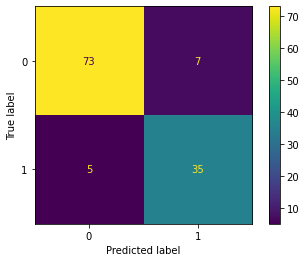

In [20]:
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        80
           1       0.83      0.88      0.85        40

    accuracy                           0.90       120
   macro avg       0.88      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120



# Elegir un valor K
¡Sigamos adelante y usemos el método del codo para elegir un buen valor K!

**Cree un bucle for (for loop) que entrene varios modelos KNN con diferentes valores k, luego realice un seguimiento de la tasa_error para cada uno de estos modelos con una lista. Consulte la lección si está confundido en este paso.**

In [22]:
tasa_error = []

# puede que tarde un poco
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    tasa_error.append(np.mean(pred_i != y_test))

**Ahora crea la siguiente gráfica usando la información de tu bucle for.**

Text(0, 0.5, 'Tasa de Error')

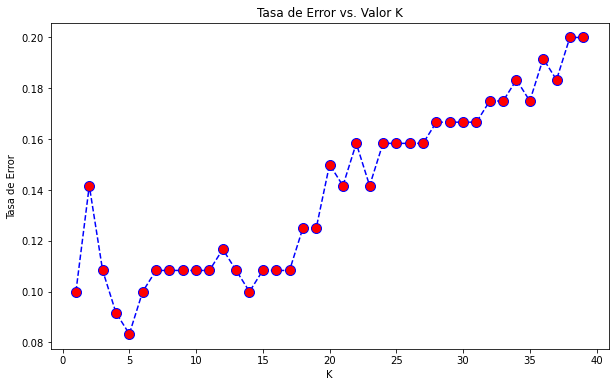

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),tasa_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error vs. Valor K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

## Reentrenamiento con nuevo valor K

**Vuelva a entrenar su modelo con el mejor valor de K (depende de usted decidir lo que desea) y vuelva a hacer el reporte de clasificación y la matriz de confusión.**

Con K=6




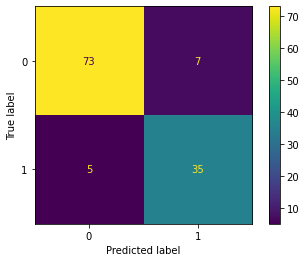



              precision    recall  f1-score   support

           0       0.94      0.91      0.92        80
           1       0.83      0.88      0.85        40

    accuracy                           0.90       120
   macro avg       0.88      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120



In [24]:
# ahora con K=6
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Con K=6')
print('\n')
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()
print('\n')
print(classification_report(y_test,pred))